In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s eta 0:00:00


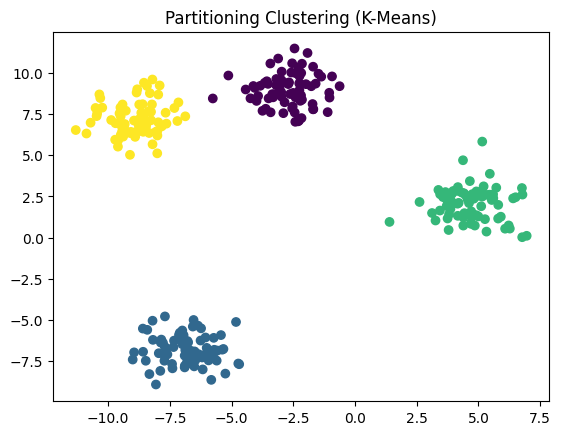

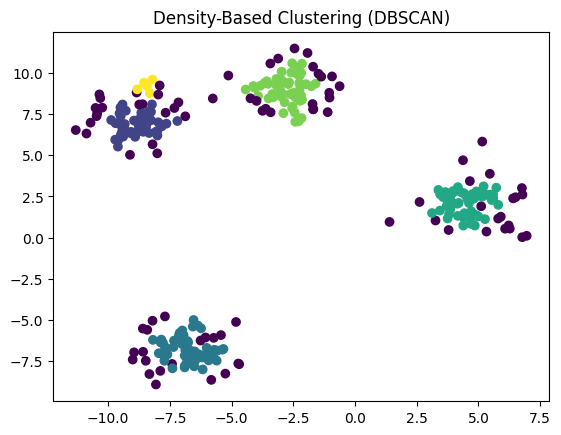

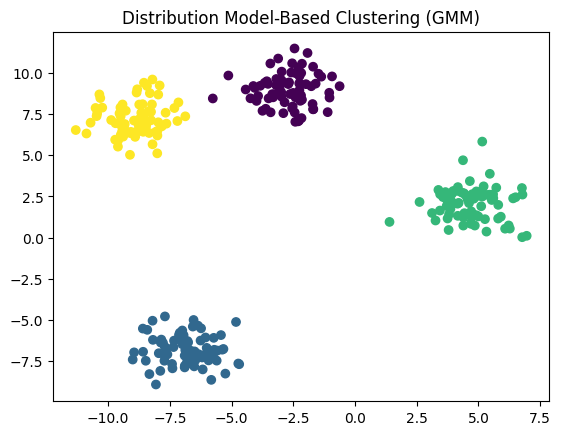

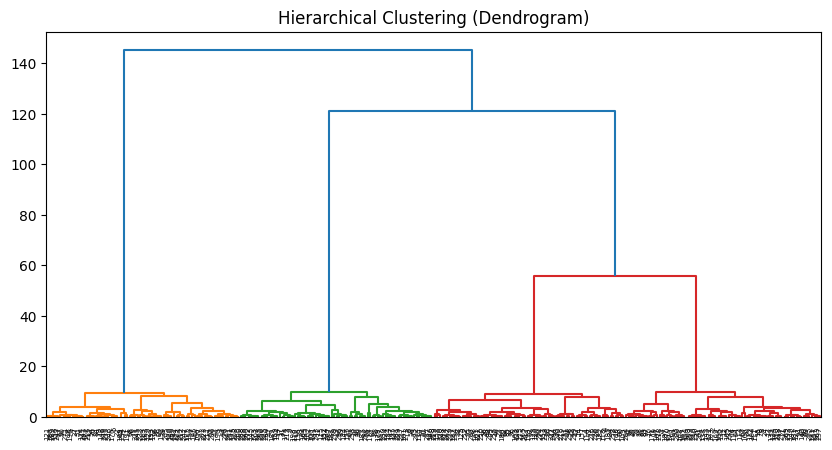

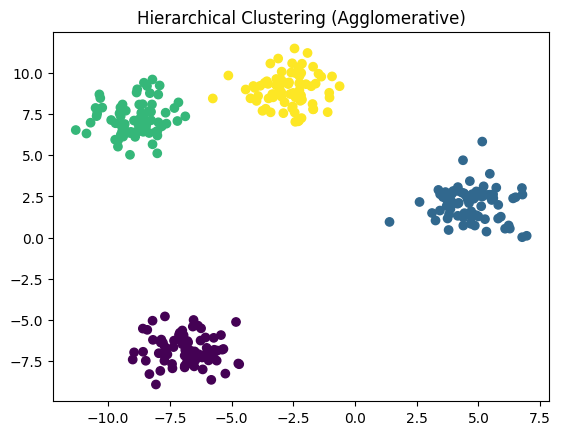

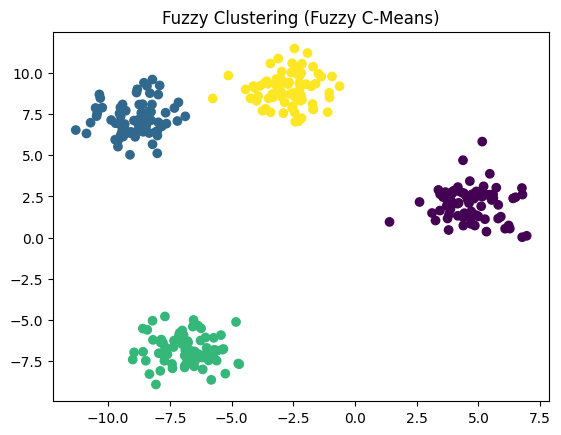

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import skfuzzy as fuzz

# Generate synthetic data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Partitioning Clustering (K-Means)
def partitioning_clustering(X):
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Partitioning Clustering (K-Means)')
    plt.show()

# Density-Based Clustering (DBSCAN)
def density_based_clustering(X):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Density-Based Clustering (DBSCAN)')
    plt.show()

# Distribution Model-Based Clustering (Gaussian Mixture Model)
def distribution_model_based_clustering(X):
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Distribution Model-Based Clustering (GMM)')
    plt.show()

# Hierarchical Clustering (Agglomerative)
def hierarchical_clustering(X):
    Z = linkage(X, method='ward')
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title('Hierarchical Clustering (Dendrogram)')
    plt.show()

    # Cut tree to form clusters
    labels = fcluster(Z, t=4, criterion='maxclust')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Hierarchical Clustering (Agglomerative)')
    plt.show()

# Fuzzy Clustering (Fuzzy C-Means)
def fuzzy_clustering(X):
    # Transpose data for fuzzy C-means
    data = np.array(X).T

    # Fuzzy C-Means
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data, c=4, m=2.0, error=0.005, maxiter=1000, init=None)

    # Assign labels
    labels = np.argmax(u, axis=0)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Fuzzy Clustering (Fuzzy C-Means)')
    plt.show()

# Run each clustering algorithm
partitioning_clustering(X)
density_based_clustering(X)
distribution_model_based_clustering(X)
hierarchical_clustering(X)
fuzzy_clustering(X)


In [ ]:
import pandas as pd

# Convert dataset to pandas DataFrame
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

# Display the first few rows of the dataset
print(df.head())

# Show dataset statistics
print("\nDataset Summary:")
print(df.describe())

# Display total number of points
print("\nTotal Number of Data Points:", len(df))


   Feature 1  Feature 2
0  -9.297689   6.473679
1  -9.698741   6.938967
2  -1.686653   7.793442
3  -7.097308  -5.781333
4 -10.876452   6.315437

Dataset Summary:
        Feature 1   Feature 2
count  300.000000  300.000000
mean    -3.403837    2.845329
std      5.289154    6.225742
min    -11.309972   -8.919342
25%     -7.952236   -1.181119
50%     -4.708134    5.066995
75%     -0.117606    8.079443
max      6.954537   11.477528

Total Number of Data Points: 300
